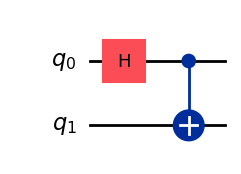

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")



In [ ]:
import random
import numpy as np

x=5
global bool_array
bool_array=[]

global gate_array
gate_array=[]

def create_rand(x):
   
    for i in range(x):
        bool_array.append(random.choice([0,1]))


def create_rand_gate(x):
   
    for i in range(x):
        gate_array.append(random.choice(["X","Z"]))

def qubit_genra(bit, basis):
    if bit == '0':
        qubit_calculation(bit,"Z")
    elif bit == '1':
        qubit_calculation(bit,"X")

           
def controlbits(bits):
    if (len(bits)=x):
        receive(bits)
    else:
        send("not good")


def qubit_calculation(bit, basis):
    if basis == 'X':
        return '0' if bit == 1 else '1'
    elif basis == 'H':
        return '+' if bit == 0 else '-'
    elif basis == 'Z':
        return '+' if bit == 0 else '-'
           
create_rand(x)
create_rand_gate(x)
print(bool_array)
print(gate_array)


class Person(ABC):
    def __init__(self,bits,basis)
    def send():
    def receive():
    def announce():
    def announce():

['1', '1', '0', '0', '1']
['X', 'Z', 'X', 'X', 'X']


In [29]:
''' Modules:
		 -qiskit
		 -qiskit_ibm_runtime
		 -qiskit_aer
'''

''' Classes and methods:
	  - QuantumCircuit
	  - AerSimulator
	  - backend.run
	  - transpile (optional)
	  - random number generator (Python or Qiskit tools)
'''

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator, AerProvider
from qiskit_ibm_runtime.fake_provider import FakeKyoto
import random

''' Noise Model '''
import numpy as np # For random numbers
from qiskit_aer.noise import NoiseModel, depolarizing_error

''' Hashing library '''
from hashlib import sha256

''' High Level Pseusocode
	1.	Alice generates random bits + bases
	2.	Bob generates random bases
	3.	Alice encodes bits using her bases
	4.	Bob measures using his bases
	5.	Compare bases over classical channel
	6.	Discard mismatched basis results
	7.	Use matching bits as secret key
'''

'''
  Args:
    n (int) : A length of bitstring

  Return:
    (str) : A random bitsting length n
'''

def random_bits_string(n):
  return ''.join(random.choice('01') for _ in range(n))

'''
  Args:
    n (int) : A length of sequence of basis

  Return:
    (str) : A random sequence of basis length n
'''

def random_basis(n):
  return ''.join(random.choice('ZX') for _ in range(n))

'''
  Args:
    bits (str) : Alice's bitstring which to be encoded

  Return:
    (QuantumCircuit) : Encoded qubit
'''

def encode_qubits(bits):
  qreg = QuantumRegister(len(bits))
  creg = ClassicalRegister(len(bits))
  circuit = QuantumCircuit(qreg, creg)


	# The enumerate() does manage index number and its value pair all them once in input data structure
	# An index i and data bit in bits


  for i,bit in enumerate(bits):
    if bit == '1':
      circuit.x(qreg[i])
  print(circuit.to_instruction())
  return circuit

'''
  Args:
    circuit (QuantumCircuit) : The qubit would be measured by Bob
    bob_basis (str) : The bases Bob use to measure the qubit from Alice

  Return:
    (QuantumCircuit) : The circuit which is added measurement devices
'''

def measure_qubits(circuit, bob_basis):
  for i in range(len(bob_basis)):
    if bob_basis[i] == 'X':
      circuit.h(i)

  circuit.measure_all(inplace=True)

  return circuit

'''
  Args:
    circuit (QuantumCircuit) : The qubit would be transpiled
    bob_bits (list) : An empty list, would stroe measurement data

  Return:
    (list) : list of measurement data regarded its counts
'''

def run_simulator(circuit, bob_bits, shot=1024):
  
  # For invoking fake provider
  #backend = FakeKyoto()
  #simulator = AerSimulator.from_backend(backend) #initialize aer-simulator from backend


  # Normal Aersimulator
  simulator = AerSimulator()
  transpiled = transpile(circuit, simulator)
  result = simulator.run(transpiled, memory=True, shot=shot).result()

  # Obtain measurement data into bob_bits
  memory = result.get_memory(transpiled)
  bob_bits.append(memory)

  return result.get_counts(transpiled)

'''
  Args:
    circuit (QuantumCircuit) : The qubit would be transpiled
    bob_bits (list) : An empty list, would stroe measurement data

  Return:
    (list) : list of measurement data regarded its counts
'''

def run_simulator_with_noise(circuit,bob_bits,shot=1024):
  # Create NoiseModel
  error = depolarizing_error(0.5,1)
  noise_model = NoiseModel()
  noise_model.add_all_qubit_quantum_error(error,'x')

  # AerSimulator with noise
  simulator = AerSimulator(noise_model=noise_model)
  transpiled = transpile(circuit, simulator)
  result = simulator.run(transpiled, memory=True,shot=shot).result()

  # Obtain measurement data into bob_bits
  memory = result.get_memory(transpiled)
  bob_bits.append(memory)

  return result.get_counts(transpiled)

'''
  Args:
    alice_basis (str) : Alice's basis
    bob_basis (str) : Bob's basis
    alice_bits (str) : Initial Alice's bits

  Return:
    (str) : The shared secret key
'''

def sift_keys(alice_basis, bob_basis, alice_bits):
  shared_key = ''
  for i in range(len(alice_basis)):
    if alice_basis[i] == bob_basis[i]:
      shared_key += alice_bits[i]
  return shared_key

'''
  Calculates the Quantum Bit Error Rate (QBER).

  Args:
    alice_bits (str) : Alice's generated bit string.
    bob_measurements (list) : A list of measurement outcomes from Bob's side
                             (each element is a string representing a shot).
    alice_bases (str) : Alice's chosen bases string.
    bob_bases (str) : Bob's chosen bases string.

  Returns:
    (float) : The calculated QBER.
'''

def qber(alice_bits, bob_measurements, alice_basis, bob_basis):
  matching_basis_bits_count = 0
  mismatched_bits_count = 0

  # Iterate through each shot
  for shot_measurement in bob_measurements:
    # Iterate through each qubit in the shot
    for i in range(len(alice_bits)):
      # Check if bases match for this qubit
      if alice_basis[i] == bob_basis[i]:
        matching_basis_bits_count += 1
        bob_measured_bit = shot_measurement[i]
        # Compare Alice's bit with Bob's measured bit for this qubit in this shot
        if alice_bits[i] != bob_measured_bit[i]:
          mismatched_bits_count += 1

  if matching_basis_bits_count == 0:
		# Avoid division by zero if no bases match
    return 0.0

  print(f"Mismatched bits count: {mismatched_bits_count}")
  print(f"Matching bases bits count: {matching_basis_bits_count}")

  return mismatched_bits_count / matching_basis_bits_count

'''
  Return:
    key (str) : The probably secure key
'''

def bb84():
  n = 29
  alice_bits = random_bits_string(n)
  alice_basis = random_basis(n)
  bob_basis = random_basis(n)

  circuit = encode_qubits(alice_bits)
  bob_measurement = measure_qubits(circuit, bob_basis)
  bob_bits = []

	# Without NoiseModel
  #results = run_simulator(bob_measurement, bob_bits)

	# With NoiseModel
  results = run_simulator_with_noise(bob_measurement,bob_bits)

  # Obtaining the secure secret key
  key = sift_keys(alice_basis, bob_basis, alice_bits)

  # Transpilation(optional)
  transpiled = transpile(bob_measurement, AerSimulator())

  # Result
  print("QBER: " + str(qber(alice_bits, bob_bits, alice_basis, bob_basis)))

  return key #if qber(alice_bits, bob_bits, alice_basis, bob_basis) < 0.2 else "None"

'''
  Arg:
    key (str) : The secret key
  Return:
    (str) : The encoded key by sha256 hash function
'''

def amplification(key):
  return sha256(bytes(key, 'utf-8')).hexdigest()

if __name__ == '__main__':
  key = bb84()
  h = amplification(key) if key != 'None' else 'Non-secure key'
  print(f"This is the key: " + str(key))
  print("This is after amplification: " + h)

Instruction(name='circuit-248', num_qubits=29, num_clbits=29, params=[])
Mismatched bits count: 7
Matching bases bits count: 13
QBER: 0.5384615384615384
This is the key: 1100011101010
This is after amplification: 4c7725b692f9598aa47f95b64f664353aab9c285933b12315940561d8911f3e5


In [35]:
# bb84_simulation.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import random
from hashlib import sha256

def random_bits_string(n):
    return ''.join(random.choice('01') for _ in range(n))

def random_basis(n):
    return ''.join(random.choice('ZX') for _ in range(n))

def encode_qubits(alice_bits: str, alice_bases: str):
    """
    Prepare qubits according to alice_bits and alice_bases.
    - If bit == '1' -> apply X (prepare |1>)
    - If alice_bases[i] == 'X' -> apply H (|0/1> -> |+/->)
    Returns: QuantumCircuit, qreg, creg
    """
    assert len(alice_bits) == len(alice_bases)
    n = len(alice_bits)
    qreg = QuantumRegister(n, 'q')
    creg = ClassicalRegister(n, 'c')  # measurement bits for Bob
    qc = QuantumCircuit(qreg, creg, name='alice_encode')

    for i, (bit, basis) in enumerate(zip(alice_bits, alice_bases)):
        if bit == '1':
            qc.x(qreg[i])
        if basis == 'X':
            qc.h(qreg[i])

    # Do NOT measure here. Bob measures later.
    return qc, qreg, creg

def measure_qubits(qc: QuantumCircuit, qreg: QuantumRegister, creg: ClassicalRegister, bob_bases: str):
    """
    Apply basis rotation (H for X) then measure q[i] -> c[i].
    """
    for i, b in enumerate(bob_bases):
        if b == 'X':
            qc.h(qreg[i])
    qc.measure(qreg, creg)
    return qc

def run_simulator(qc: QuantumCircuit, shots=1024, noise_model=None):
    """
    Run AerSimulator and return memory (list of shot bitstrings) and counts.
    """
    simulator = AerSimulator(noise_model=noise_model)
    transpiled = transpile(qc, simulator)
    job = simulator.run(transpiled, memory=True, shots=shots)
    result = job.result()
    memory = result.get_memory(transpiled)  # list of bitstrings (one string per shot)
    counts = result.get_counts(transpiled)
    return memory, counts

def sift_keys(alice_bits: str, alice_bases: str, bob_bases: str, bob_shot: str):
    """
    Single-shot sifting: keep positions where alice_bases == bob_bases.
    bob_shot is a bitstring where position i corresponds to qubit i (because measure(q[i], c[i]) was used).
    Returns (alice_sift, bob_sift) as strings.
    """
    assert len(alice_bits) == len(alice_bases) == len(bob_bases) == len(bob_shot)
    alice_sift = []
    bob_sift = []
    for i in range(len(alice_bits)):
        if alice_bases[i] == bob_bases[i]:
            alice_sift.append(alice_bits[i])
            bob_sift.append(bob_shot[i])
    return ''.join(alice_sift), ''.join(bob_sift)

def compute_qber(alice_bits: str, alice_bases: str, bob_bases: str, bob_memory_list):
    """
    Compute QBER across all shots using only positions where bases match.
    """
    total_matching = 0
    total_errors = 0
    if not bob_memory_list:
        return 0.0
    for shot in bob_memory_list:
        for i in range(len(alice_bits)):
            if alice_bases[i] == bob_bases[i]:
                total_matching += 1
                if shot[i] != alice_bits[i]:
                    total_errors += 1
    if total_matching == 0:
        return 0.0
    return total_errors / total_matching

def bb84(n=29, shots=1024, use_noise=False):
    alice_bits = random_bits_string(n)
    alice_bases = random_basis(n)
    bob_bases = random_basis(n)

    qc, qreg, creg = encode_qubits(alice_bits, alice_bases)
    qc = measure_qubits(qc, qreg, creg, bob_bases)

    noise_model = None
    if use_noise:
        err = depolarizing_error(0.01, 1)
        noise_model = NoiseModel()
        noise_model.add_all_qubit_quantum_error(err, ['x', 'h'])

    memory, counts = run_simulator(qc, shots=shots, noise_model=noise_model)

    # Example: use the first shot as demonstration of sifting
    first_shot = memory[0]
    alice_sift, bob_sift = sift_keys(alice_bits, alice_bases, bob_bases, first_shot)
    qber_value = compute_qber(alice_bits, alice_bases, bob_bases, memory)

    return {
        'alice_bits': alice_bits,
        'alice_bases': alice_bases,
        'bob_bases': bob_bases,
        'first_shot': first_shot,
        'alice_sift': alice_sift,
        'bob_sift': bob_sift,
        'qber': qber_value,
        'counts': counts
    }

def privacy_amplify(key_str):
    return sha256(key_str.encode()).hexdigest()

if __name__ == '__main__':
    out = bb84(n=29, shots=2048, use_noise=True)
    print("Alice bits: ", out['alice_bits'])
    print("Alice bases:", out['alice_bases'])
    print("Bob bases:  ", out['bob_bases'])
    print("First shot:  ", out['first_shot'])
    print("Alice sift:  ", out['alice_sift'])
    print("Bob sift:    ", out['bob_sift'])
    print("QBER:        ", out['qber'])
    if out['alice_sift']:
        print("Amplified:   ", privacy_amplify(out['alice_sift']))
    else:
        print("No sifted key (all bases mismatched).")


Alice bits:  01011010001111010000011110110
Alice bases: ZZXXXZXZXXZXXXXZXZXZXZXXZZZZZ
Bob bases:   ZZZZXXZZZXZZXXXXZZZZXXZXZXZZX
First shot:   11111111001010011110001010010
Alice sift:   0110011100001111
Bob sift:     1111011001000101
QBER:         0.280914306640625
Amplified:    ceedf34c81613448ab6c20309ae9ac41d384f6845973de5d751a2a44e200d6ad
